<a href="https://colab.research.google.com/github/paddy-03/Voice-Recognition-of-a-Singer/blob/master/Voice_Rec_(pre_process).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre Processing**


1) Reading .wav files using scipy.



2) Extracting 5 clips of 20 seconds from each song.

3) Converting that clip to spectrogram

4) Using Data Augmentation:

    a) Time Shifting
    b) Speed Tuning



In [0]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import os,shutil
import math

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir('./drive/My Drive')

In [0]:
base_dir = os.getcwd()
src_dir = base_dir + '/Songs_Dataset/'
tar_dir = base_dir + '/Specs/'

In [0]:
folders = os.listdir(src_dir+'test')
for folder in folders:
      path = tar_dir + 'test'
      print(path+'/'+folder)
      os.mkdir(path+'/'+folder)

In [0]:
folders = os.listdir(src_dir+'train')
for folder in folders:
      path = tar_dir + 'train'
      print(path+'/'+folder)
      os.mkdir(path+'/'+folder)

/content/drive/My Drive/Specs/train/Shreya Ghoshal
/content/drive/My Drive/Specs/train/Armaan Malik
/content/drive/My Drive/Specs/train/Arijit Singh
/content/drive/My Drive/Specs/train/Sonu Nigam
/content/drive/My Drive/Specs/train/Honey Singh
/content/drive/My Drive/Specs/train/Atif Aslam
/content/drive/My Drive/Specs/train/Raahat Fateh Ali Khan
/content/drive/My Drive/Specs/train/Sunidhi Chauhan


In [0]:
folders = os.listdir(src_dir+'validation')
for folder in folders:
      path = tar_dir + 'validation'
      print(path+'/'+folder)
      os.mkdir(path+'/'+folder)

/content/drive/My Drive/Specs/validation/Armaan Malik
/content/drive/My Drive/Specs/validation/Shreya Ghoshal
/content/drive/My Drive/Specs/validation/Atif Aslam
/content/drive/My Drive/Specs/validation/Honey Singh
/content/drive/My Drive/Specs/validation/Raahat Fateh Ali Khan
/content/drive/My Drive/Specs/validation/Arijit Singh
/content/drive/My Drive/Specs/validation/Sonu Nigam
/content/drive/My Drive/Specs/validation/Sunidhi Chauhan


In [0]:
import IPython.display as ipd

In [0]:
directories = os.listdir(currDir)
directories

['test', 'validation', 'train']

In [0]:
currDir = src_dir
directories = os.listdir(currDir)
i=2
folders = os.listdir(currDir+directories[i])
destDir = tar_dir + directories[i]

for folder in folders:
        ctr=140
        files = os.listdir(currDir+directories[i]+'/'+folder)
        for file in files:
                  rate, X = scipy.io.wavfile.read(currDir+directories[i]+'/'+folder+'/'+file)
                  length = np.shape(X)[0]/float(rate) #to show the length of song
            
                  if length >=160:
                      clips=[]

                      clips.append(X[rate*30:rate*50])

                      clips.append(X[rate*50:rate*70])

                      clips.append(X[rate*60:rate*80])

                      clips.append(X[rate*120:rate*140])

                      clips.append(X[rate*140:rate*160])


                  for clip in clips:
                    
                    #No augmentation
                    ctr+=1
                    clip = scipy.mean(clip, axis=1)
                    
                    clip = scipy.mean(clip, axis=1)
                    plt.axis('off')
                    plt.specgram(clip, Fs=rate, cmap=plt.get_cmap("viridis"))
                    #plt.show()
                    print(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png")
                    plt.savefig(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png", bbox_inches='tight') 
                    plt.close()
                    
                    #time_shift (Augmentation)
                    
                    start_ = int(np.random.uniform(-4800,4800))
                    if start_ >= 0:
                        wav_time_shift = np.r_[clip[start_:], np.random.uniform(-0.001,0.001, start_)]
                    else:
                        wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), clip[:start_]]
                    
                    plt.axis('off')
                    plt.specgram(wav_time_shift, Fs=rate, cmap=plt.get_cmap("viridis"))
                    #plt.show()
                    print(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png")
                    plt.savefig(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png", bbox_inches='tight') 
                    plt.close()
                    ctr+=1
                    
                  
                    clip = scipy.mean(clip, axis=1)
                    plt.axis('off')
                    plt.specgram(clip, Fs=rate, cmap=plt.get_cmap("viridis"))
                    #plt.show()
                    print(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png")
                    plt.savefig(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png", bbox_inches='tight') 
                    plt.close()
                    
                    #speed tuning (Augmentation)
               
                    speed_rate = np.random.uniform(0.9,1.1)
                    wav_speed_tune = cv2.resize(clip, (1, int(len(clip) * speed_rate))).squeeze()
               #     print(wav_speed_tune.shape)
              #      print('speed rate: %.3f' % speed_rate, '(lower is faster)')
                    if len(wav_speed_tune) < 441000:
                        pad_len = 441000 - len(wav_speed_tune)
                        wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                                               wav_speed_tune,
                                               np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
                    else: 
                        cut_len = len(wav_speed_tune) - 441000
                        wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+441000]
                #    print('wav length: ', wav_speed_tune.shape[0])
                    
                    plt.axis('off')
                    plt.specgram(wav_speed_tune, Fs=rate, cmap=plt.get_cmap("viridis"))
                    #plt.show()
                    print(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png")
                    plt.savefig(destDir+'/'+folder+'/'+"_clip_"+str(ctr)+".png", bbox_inches='tight') 
                    plt.close()
               


### Resizing the spectrograms to 225x150x3

In [0]:
import cv2

In [0]:
directories = os.listdir(currDir)
directories

['test', 'train', 'validation']

In [0]:
currDir = tar_dir
directories = os.listdir(currDir)
i=1
folders = os.listdir(currDir+directories[i])
destDir = tar_dir + directories[i]

for folder in folders:
        
        clips = os.listdir(currDir+directories[i]+'/'+folder)
        

        for clip in clips:
                    dirr = currDir + directories[i]+ '/' + folder + '/' + clip
                    pixels = cv2.imread(dirr)
                    pixels = cv2.resize(pixels,(225,150))
                    
                    cv2.imwrite(dirr,pixels)
                    print(dirr)

/content/drive/My Drive/Specs/train/Arijit Singh/_clip_3.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_4.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_5.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_6.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_7.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_8.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_9.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_10.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_11.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_51.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_12.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_52.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_13.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_53.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_14.png
/content/drive/My Drive/Specs/train/Arijit Singh/_clip_54.png
/content/drive/

In [0]:
count={}
currDir = tar_dir
directories = os.listdir(currDir)
directories
for i in range(len(directories)):
    ctr=0
    folders = os.listdir(currDir+directories[i])
    destDir = tar_dir + directories[i]

    for folder in folders:
        
        clips = os.listdir(currDir+directories[i]+'/'+folder)
        
        
        for clip in clips:
           ctr+=1
            
    count[directories[i]] = ctr
print(count)

{'test': 245, 'train': 3303, 'validation': 225}


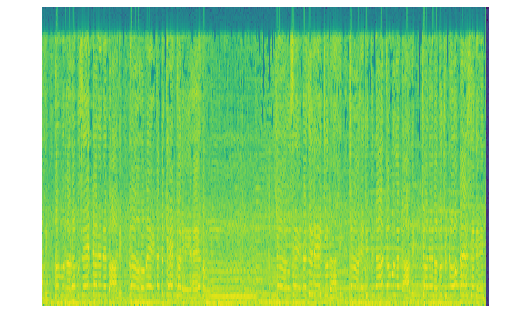

In [0]:
plt.axis('off')
plt.specgram(wav_time_shift, Fs=rate, cmap=plt.get_cmap("viridis"))
plt.show()
plt.close()

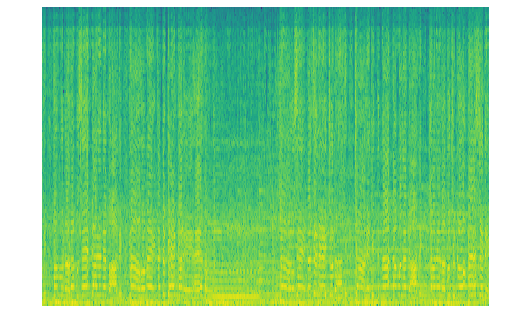

In [0]:
plt.axis('off')
plt.specgram(wav_speed_tune, Fs=rate, cmap=plt.get_cmap("viridis"))
plt.show()
plt.close()

In [0]:
ipd.Audio(clip, rate=rate)

In [0]:
start_ = int(np.random.uniform(-4800,4800))
print('time shift: ',start_)
if start_ >= 0:
    wav_time_shift = np.r_[clip[start_:], np.random.uniform(-0.001,0.001, start_)]
else:
    wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), clip[:start_]]
ipd.Audio(wav_time_shift, rate=rate)

time shift:  3443


In [0]:
print(clip.shape)
speed_rate = np.random.uniform(0.9,1.1)
wav_speed_tune = cv2.resize(clip, (1, int(len(clip) * speed_rate))).squeeze()
print(wav_speed_tune.shape)
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < 441000:
    pad_len = 441000 - len(wav_speed_tune)
    wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                           wav_speed_tune,
                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - 441000
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+441000]
print('wav length: ', wav_speed_tune.shape[0])
ipd.Audio(wav_speed_tune, rate=rate)

(441000,)
(451812,)
speed rate: 1.025 (lower is faster)
wav length:  441000
